In [270]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from category_encoders.one_hot import OneHotEncoder
# from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from scipy.stats import norm
from sklearn.pipeline import Pipeline
from pandas_profiling import ProfileReport
from xgboost import XGBClassifier 
from sklearn.metrics import classification_report

In [247]:
file = 'train.csv'
data = pd.read_csv(file, index_col=0)
print(data.shape)
data.head()
data.drop(['id'], axis=1, inplace=True)

(103904, 24)


In [248]:

#Fazendo o tratamento de dados
nulos_arrival = data['Arrival Delay in Minutes'].isna().sum()
porcentagem_nulos = int(nulos_arrival)/int(data.shape[0])*100
print(f'porcentagem de nulos = {porcentagem_nulos}')
data.isnull().sum()

#Logo, como a porcentagem de nulos é muito baixa (menos de 0.5%) minha escolha para tratar vai ser excluir todos
data.dropna(inplace=True)
data.head(2)


porcentagem de nulos = 0.29835232522328303


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [249]:
# report = ProfileReport(data,title='Airline')
# report.to_notebook_iframe()

Female    52576
Male      51018
Name: Gender, dtype: int64
Porcentagem de mulheres = 50.75%
Porcentagem de homens = 49.25%


Text(0, 0.5, 'Contagem')

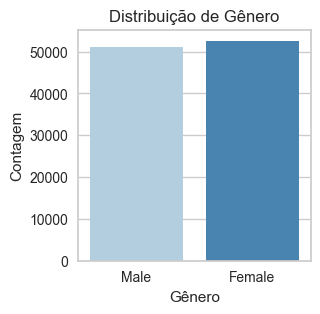

In [250]:
#Entendendo melhor como o meu dataset está estruturado 
"""
1. Como está minha distribuição de genero ?
    Female    52576 - 50.75%
    Male      51018 - 49.25%
    
    Ou seja, temos uma distribuição aceitavel para o nosso projeto

2. Como está a minha distribuição de Tipo de cliente ?

    Loyal Customer       84662 - 81.72%
    disloyal Customer    18932 - 18.28%
    Está desbalanceado. Conferir se vai influenciar os modelos

3. Como está a minha distribuição de Tipo de viagem ?

    Business travel    71465 - 68.99%
    Personal Travel    32129 - 31.01%


4. Como está a minha distribuição de idade ?
    - Não temos outliers nas nossas idades
    - A distribuição das idades não é normal


5. Como está a minha distribuição de Classe ?
    Business    49533 - 47.81%
    Eco         46593 - 44.98%
    Eco Plus     7468 - 7.21%

"""
#(1)
genero = data['Gender']
print(genero.value_counts())
print(f'Porcentagem de mulheres = { round((genero.value_counts()[0]/genero.shape[0]) * 100, 2) }%')
print(f'Porcentagem de homens = { round((genero.value_counts()[1]/genero.shape[0]) * 100, 2) }%')

#Plotando um gráfico para treinamento, analisando essa distribuição de idades
fig, ax = plt.subplots(figsize=(3, 3))
sns.countplot(x=data['Gender'], data=data, palette='Blues',ax=ax)
# Adiciona um título e rótulos de eixos
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')


Loyal Customer       84662
disloyal Customer    18932
Name: Customer Type, dtype: int64
Porcentagem de Loyal Customer  = 81.72%
Porcentagem de disloyal Customer = 18.28%


Text(0, 0.5, 'Contagem')

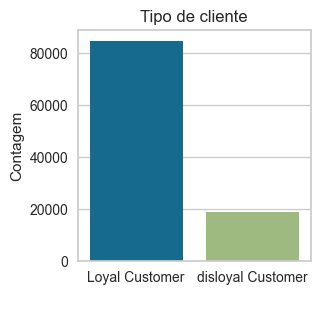

In [251]:
#Respondendo 2

tipo_cliente = data['Customer Type']
print(tipo_cliente.value_counts())
print(f'Porcentagem de Loyal Customer  = { round((tipo_cliente.value_counts()[0]/tipo_cliente.shape[0]) * 100, 2) }%')
print(f'Porcentagem de disloyal Customer = { round((tipo_cliente.value_counts()[1]/tipo_cliente.shape[0]) * 100, 2) }%')

#plotando um gráfico simples de barras para treinar usar o seaborn
fig, ax = plt.subplots(figsize=(3, 3))
sns.countplot(x=tipo_cliente, data=data, ax=ax)
plt.title('Tipo de cliente')
plt.xlabel(' ')
plt.ylabel('Contagem')

Business travel    71465
Personal Travel    32129
Name: Type of Travel, dtype: int64
Porcentagem de Business travel  = 68.99%
Porcentagem de Personal Travel = 31.01%


([<matplotlib.patches.Wedge at 0x19baa886500>,
 [Text(-0.6178815868203661, 0.9100672198625477, 'Business travel'),
  Text(0.6178815016137211, -0.9100672777127926, 'Personal Travel')],
 [Text(-0.337026320083836, 0.49640030174320776, '69.0%'),
  Text(0.3370262736074842, -0.4964003332978868, '31.0%')])

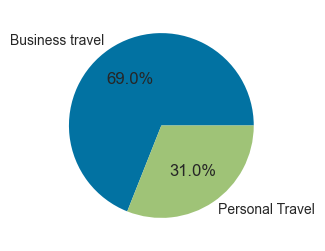

In [252]:
#Respondendo 3 
tipo_viagem = data['Type of Travel']
print(tipo_viagem.value_counts())
print(f'Porcentagem de Business travel  = { round((tipo_viagem.value_counts()[0]/tipo_viagem.shape[0]) * 100, 2) }%')
print(f'Porcentagem de Personal Travel = { round((tipo_viagem.value_counts()[1]/tipo_viagem.shape[0]) * 100, 2) }%')

#plotando o gráfico de barras para treinar 
fig, ax = plt.subplots(figsize=(3, 3))
ax.pie(tipo_viagem.value_counts(), labels=tipo_viagem.value_counts().index, autopct='%1.1f%%', colors=sns.color_palette())

Tudo certo com as idades


C:\Users\Vinicius\AppData\Local\Temp\ipykernel_8500\2573803104.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x='Age', shade=True)


<AxesSubplot: xlabel='Age', ylabel='Density'>

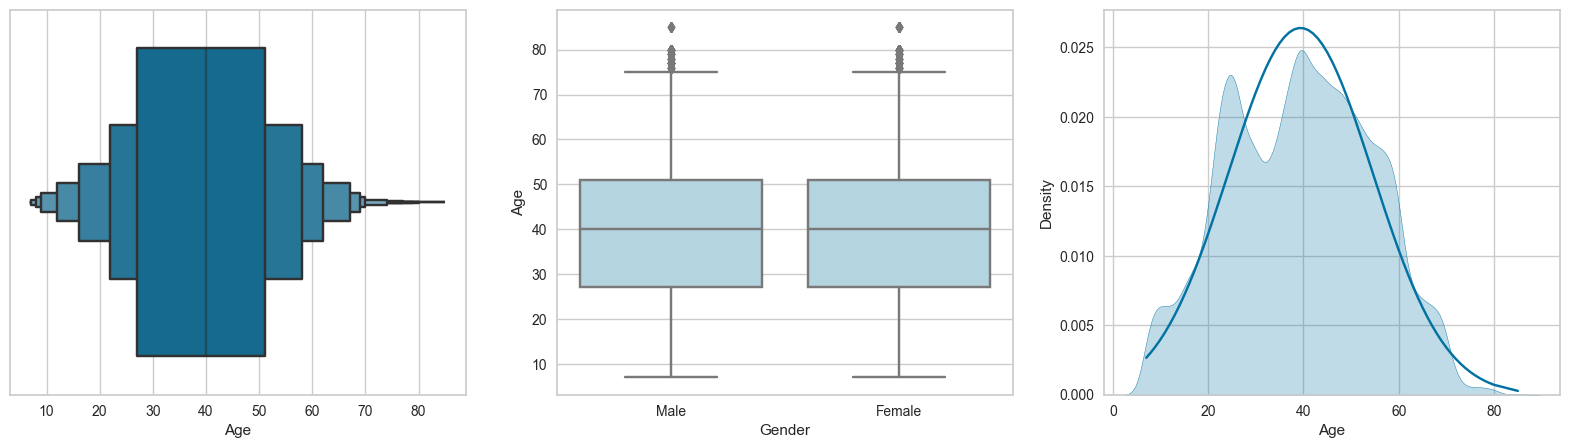

In [253]:
#Respondendo (4)

idade = data['Age']
contagem_idade = idade.value_counts()
idades_erradas = (idade < 0) | (idade > 120)
if any(idades_erradas):
    print('Há idade fora do range possível')    
else:
    print('Tudo certo com as idades')
#Conferir se há outliers na idade
mu, sigma = norm.fit(data['Age'])
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.boxenplot(x=idade, ax=axs[0])
sns.boxplot(x='Gender', y='Age', data=data, showfliers=True, whis=1.0, color='lightblue',ax=axs[1])
plt.plot(sorted(data['Age']), norm.pdf(sorted(data['Age']), mu, sigma))
sns.kdeplot(data=data, x='Age', shade=True) 



Business    49533
Eco         46593
Eco Plus     7468
Name: Class, dtype: int64
Porcentagem de Business = 47.81%
Porcentagem de Eco = 44.98%
Porcentagem de Eco Plus = 7.21%


<AxesSubplot: xlabel='Class', ylabel='count'>

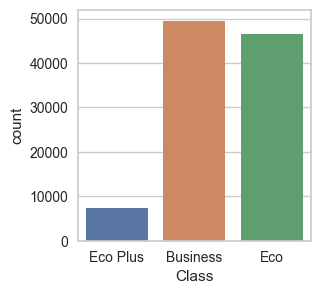

In [254]:
#Respondendo 5
tipos_classes = data['Class']

print(tipos_classes.value_counts())
print(f'Porcentagem de Business = { round((tipos_classes.value_counts()[0]/tipos_classes.shape[0]) * 100, 2) }%')
print(f'Porcentagem de Eco = { round((tipos_classes.value_counts()[1]/tipos_classes.shape[0]) * 100, 2) }%')
print(f'Porcentagem de Eco Plus = { round((tipos_classes.value_counts()[2]/tipos_classes.shape[0]) * 100, 2) }%')

#plotando um gráfico de barras para a distribuição
fig, ax = plt.subplots(figsize=(3, 3))
sns.countplot(data=data, x='Class', palette='deep')


In [255]:
print(data.dtypes)
data.head(2)

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [256]:
file = 'train.csv'
data = pd.read_csv(file, index_col=0)
print(data.shape)
data.head()
data.drop(['id'], axis=1, inplace=True)
#Fazendo o tratamento de dados
nulos_arrival = data['Arrival Delay in Minutes'].isna().sum()
porcentagem_nulos = int(nulos_arrival)/int(data.shape[0])*100
print(f'porcentagem de nulos = {porcentagem_nulos}')
data.isnull().sum()

#Logo, como a porcentagem de nulos é muito baixa (menos de 0.5%) minha escolha para tratar vai ser excluir todos
data.dropna(inplace=True)
data.head(2)


(103904, 24)
porcentagem de nulos = 0.29835232522328303


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [257]:
#Separando os dados
x = data.iloc[:, 0:22]
y = data.iloc[:, -1]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=0)
print(x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(77695, 22) (25899, 22) (77695,) (25899,)


In [258]:
#Tratando os dados da base de treino
le = LabelEncoder()
x_treino['Class'] = le.fit_transform(x_treino['Class'])

le_target = LabelEncoder()
y_treino = le_target.fit_transform(y_treino)
y_teste = le_target.transform(y_teste)


ohe = OneHotEncoder(cols=['Gender', 'Customer Type', 'Type of Travel'], use_cat_names=True)
x_treino = ohe.fit_transform(x_treino)

#Para a base de teste, precisamos passar esses mesmos tratamentos
x_teste['Class'] = le.transform(x_teste['Class'])
x_teste = ohe.transform(x_teste)




### Random Forest

In [259]:
#Treinando os modelos: Random Forest
modelo_arvore = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=20, min_samples_leaf=4, max_features='log2')
treino_arvore = modelo_arvore.fit(x_treino, y_treino)

previsao_arvore = treino_arvore.predict(x_teste)
acc_arvore = accuracy_score(y_teste, previsao_arvore)
confusao_arvore = confusion_matrix(y_teste, previsao_arvore)
print(acc_arvore)
confusao_arvore

0.9596895633036024


array([[14296,   362],
       [  682, 10559]], dtype=int64)

### SVC

In [260]:
#Testar outros parametros para o SVC
modelo_svc = SVC(C=2, kernel='poly')
treino_svc = modelo_svc.fit(x_treino, y_treino)
previsao_svc = modelo_svc.predict(x_teste)
acc_svc = accuracy_score(y_teste, previsao_svc)
print(acc_svc)
confusao_svc = confusion_matrix(y_teste, previsao_svc)
print(acc_svc)
confusao_svc

0.7148924668906136
0.7148924668906136


array([[13977,   681],
       [ 6703,  4538]], dtype=int64)

### XGBClassifier

In [261]:
#Testando o modelo de XGBClassifier
modelo_XGBClassifier = XGBClassifier(max_depth=4, learning_rate=0.05, n_estimators=100, subsample=0.675, colsample_bytree=0.9, reg_alpha=0.5, reg_lambda=0.5, random_state=42)
treino_xgb = modelo_XGBClassifier.fit(x_treino, y_treino)
previsao_xgb = treino_xgb.predict(x_teste)
acc_xgb = accuracy_score(y_teste, previsao_xgb)
print(acc_xgb)
confusao_xgb = confusion_matrix(y_teste, previsao_xgb)
confusao_xgb 

0.9378354376616858


array([[14025,   633],
       [  977, 10264]], dtype=int64)

### Rede neural

In [262]:
#Treinando o modelo de rede neural
modelo_neural = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, alpha=0.0001, solver='adam', verbose=False,  random_state=21, tol=0.00001)
treino_neural = modelo_neural.fit(x_treino, y_treino)
previsao_neural = treino_neural.predict(x_teste)
acc_neural = accuracy_score(y_teste, previsao_neural)
print(acc_neural)
confusao_neural = confusion_matrix(y_teste, previsao_neural)
confusao_neural

0.9413490868373297


array([[13973,   685],
       [  834, 10407]], dtype=int64)

##### Coeficientes rede neural 

In [263]:
#Vendo os pesos da rede neural
coefs = treino_neural.coefs_

# Crie um DataFrame vazio para armazenar os coeficientes
df_coefs = pd.DataFrame()

# Preencha o DataFrame com os coeficientes
for i, layer_coefs in enumerate(coefs):
    layer_name = f'Layer {i}'
    num_neurons_in = layer_coefs.shape[0]
    num_neurons_out = layer_coefs.shape[1]
    columns = [f'Neuron {j}' for j in range(num_neurons_out)]
    index = [f'Neuron {j}' for j in range(num_neurons_in)]
    layer_df = pd.DataFrame(layer_coefs, columns=columns, index=index)
    df_coefs[layer_name] = layer_df.unstack()

df_coefs

Layer 0        Layer 1        Layer 2
Neuron 0  Neuron 0  -6.661287e-316 -5.424445e-316   1.521156e-02
          Neuron 1   3.071976e-315   1.240561e-93  1.205274e-315
          Neuron 2   4.168522e-315   1.123425e-03 -3.205322e-315
          Neuron 3   2.934807e-315  -4.643107e-28  3.246078e-315
          Neuron 4   9.612312e-317  6.161209e-179  -2.920889e-01
...                            ...            ...            ...
Neuron 99 Neuron 20 -7.970257e-316  1.082818e-315            NaN
          Neuron 21  9.428385e-316   3.247309e-02            NaN
          Neuron 22 -1.908013e-315 -3.303628e-315            NaN
          Neuron 23  3.167263e-315   8.596115e-02            NaN
          Neuron 24  3.029952e-315 -1.264223e-315            NaN

[2500 rows x 3 columns]

### KNN

In [264]:
#Treinando o modelo de KNN
modelo_knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
treino_knn = modelo_knn.fit(x_treino, y_treino)
previsao_knn = treino_knn.predict(x_teste)
acc_knn = accuracy_score(y_teste, previsao_knn)
print(acc_knn)
confusao_knn = confusion_matrix(y_teste, previsao_knn)
confusao_knn

0.7427699911193483


array([[11603,  3055],
       [ 3607,  7634]], dtype=int64)

### Testando com dados separados que nunca vi antes 

In [265]:
#Fazendo a importação dos dados e a limpeza de dados nulos. 
#Próximo passo é fazer o encoding dos dados categóricos
file = 'test.csv'
data_teste = pd.read_csv(file, index_col=0)
data_teste.drop(['id'], axis=1, inplace=True)
data_teste.dropna(inplace=True)

#Tratando os dados da base de teste
data_x = data_teste.iloc[:, 0:22]
data_y = data_teste.iloc[:, -1]


data_y = le_target.transform(data_y)

data_x['Class'] = le.transform(data_x['Class'])
data_x = ohe.transform(data_x)


In [266]:
data_x

,Gender_Female,Gender_Male,Customer Type_disloyal Customer,Customer Type_Loyal Customer,Age,Type of Travel_Business travel,Type of Travel_Personal Travel,Class,Flight Distance,Inflight wifi service,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,1,52,1,0,1,160,5,...,3,5,5,5,5,2,5,5,50,44.0
1,1,0,0,1,36,1,0,0,2863,1,...,5,4,4,4,4,3,4,5,0,0.0
2,0,1,1,0,20,1,0,1,192,2,...,2,2,4,1,3,2,2,2,0,0.0
3,0,1,0,1,44,1,0,0,3377,0,...,4,1,1,1,1,3,1,4,0,6.0
4,1,0,0,1,49,1,0,1,1182,2,...,2,2,2,2,2,4,2,4,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0,1,1,0,34,1,0,0,526,3,...,4,4,3,2,4,4,5,4,0,0.0
25972,0,1,0,1,23,1,0,0,646,4,...,4,4,4,5,5,5,5,4,0,0.0
25973,1,0,0,1,17,0,1,1,828,2,...,2,2,4,3,4,5,4,2,0,0.0
25974,0,1,0,1,14,1,0,0,1127,3,...,4,4,3,2,5,4,5,4,0,0.0


In [267]:
#Fazendo a predicao de dados que os modelos ainda não tiveram contato
teste_oficial_arvore = treino_arvore.predict(data_x)
teste_oficial_svc = treino_svc.predict(data_x)
teste_oficial_xgb = treino_xgb.predict(data_x)
teste_oficial_neural = treino_neural.predict(data_x)



In [268]:
#Fazendo a avaliacao das métricas dos modelos para o teste oficial

acc_arvore = accuracy_score(data_y, teste_oficial_arvore)
acc_svc = accuracy_score(data_y, teste_oficial_svc)
acc_xgb = accuracy_score(data_y, teste_oficial_xgb)
acc_neural = accuracy_score(data_y, teste_oficial_neural)

print(f'acuracia arvore = {acc_arvore}')
print(f'acuracia svc = {acc_svc}')
print(f'acuracia xgb = {acc_xgb}')
print(f'acuracia neural = {acc_neural}')


acuracia arvore = 0.9592553972116016
acuracia svc = 0.7112733171127331
acuracia xgb = 0.9384003398601939
acuracia neural = 0.9395203336809176


In [277]:
metricas_arvore = classification_report(data_y, teste_oficial_arvore)
metricas_svc = classification_report(data_y, teste_oficial_svc)
metricas_xgb = classification_report(data_y, teste_oficial_xgb)
metricas_neural = classification_report(data_y, teste_oficial_neural)

print('Metricas arvore')
print(metricas_arvore)
print('------------------------------------------------------------------------')
print('Metricas svc')
print(metricas_svc)
print('------------------------------------------------------------------------')
print('Metricas xgb')
print(metricas_xgb)
print('------------------------------------------------------------------------')
print('Metricas neural')
print(metricas_neural)


Metricas arvore
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14528
           1       0.97      0.94      0.95     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893

------------------------------------------------------------------------
Metricas svc
              precision    recall  f1-score   support

           0       0.67      0.95      0.79     14528
           1       0.87      0.40      0.55     11365

    accuracy                           0.71     25893
   macro avg       0.77      0.68      0.67     25893
weighted avg       0.76      0.71      0.68     25893

------------------------------------------------------------------------
Metricas xgb
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     14528
           1       0.94      0.91      0.93     1

In [271]:
#Testando fazer o label encoder 
# encoder = LabelEncoder()
# x_treino['Class'] = encoder.fit_transform(x_treino['Class'])

#Fazendo o label encoder para a coluna gender

# le_feature = LabelEncoder()
# x_treino['Class'] = le_feature.fit_transform(x_treino['Class'])

# # le_target = LabelEncoder()
# # y_treino['satisfaction'] = le_target.fit_transform(y_treino['satisfaction'])

# colunas_ohe = ['Gender', 'Customer Type', 'Type of Travel']

# transformacao_ohe = Pipeline(steps=[
#         ('onehot', OneHotEncoder())
#                                     ])

# transformacao_final = ColumnTransformer(transformers=[
#     ('onehot', transformacao_ohe, colunas_ohe)
# ])

# pipeline_final = Pipeline(steps=[
#     ('transformacao', transformacao_final),
#     ('modelo_arvore', SVC(C=2, kernel='poly'))
# ])

# teste = pipeline_final.fit(x_treino, y_treino)

# print(teste.score(x_teste, y_teste))